# Import Library & Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option('display.max_columns',9999)
pd.set_option('display.max_rows',9999)

from scipy import stats
from scipy.stats import kstest

!pip install catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
traindata = pd.read_csv('/content/drive/MyDrive/Competition & Project/CustomerChurn/Churn_Modelling.csv')
traindata.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


Customer ID: A unique identifier for each customer

Surname: The customer's surname or last name

Credit Score: A numerical value representing the customer's credit score

Geography: The country where the customer resides (France, Spain or Germany)

Gender: The customer's gender (Male or Female)

Age: The customer's age.

Tenure: The number of years the customer has been with the bank

Balance: The customer's account balance

NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)

HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)

IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)

EstimatedSalary: The estimated salary of the customer

Exited: Whether the customer has churned (1 = yes, 0 = no)

# EDA

### Basic Understanding Data

In [ ]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [ ]:
traindata.describe(include = 'O')

,Surname,Geography,Gender
count,10002,10001,10002
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5458


In [ ]:
traindata.describe(include = [int,float])

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


### Cek duplicates & null value

In [ ]:
traindata[traindata.duplicated()==True]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [ ]:
traindata.isna().sum().to_frame().T

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,0,1,0,1,0,0,0,1,1,0,0


In [ ]:
traindata.groupby('Geography')['EstimatedSalary'].mean().to_frame()

,EstimatedSalary
Geography,
France,99904.790702
Germany,101110.158243
Spain,99440.572281


**Catatan**
* Fitur seperti RowNumber, CustomerId, dan Surname tidak mempengaruhi data target sehingga bisa didrop
* Ada 2 data terduplikat sehingga harus didrop
* Sangat sedikit data hilang, bisa di isi dengan analisa lebih lanjut

### Cek sebaran data

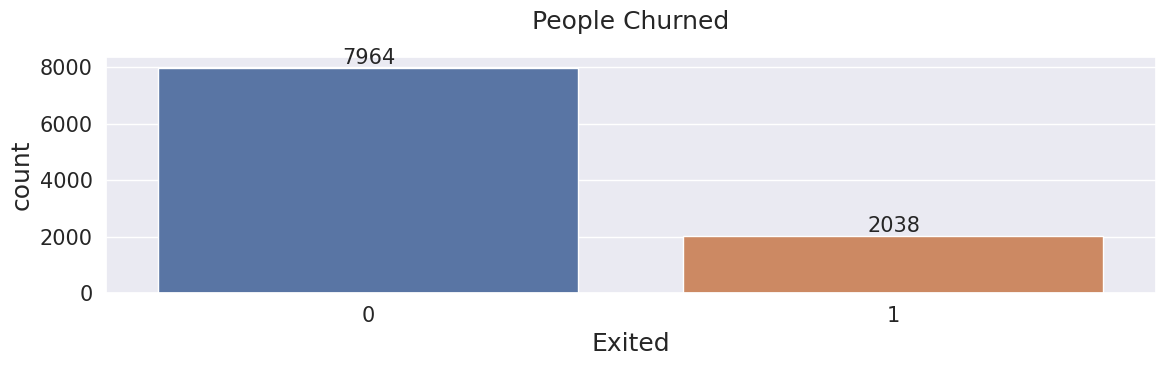

(None, None)

In [ ]:
val = traindata.Exited.value_counts()
plt.figure(figsize = (12,4))
ax = sns.countplot(data = traindata, x = 'Exited')
for i, count in enumerate(val):
  ax.text(i, count, str(count), ha = 'center', va = 'bottom', size = 15)
plt.xticks( size = 15)
plt.yticks(size = 15)
plt.title('People Churned', pad = 20)
plt.tight_layout(), plt.show()

**Catatan**
cukup sedikit orang yang memutuskan untuk keluar

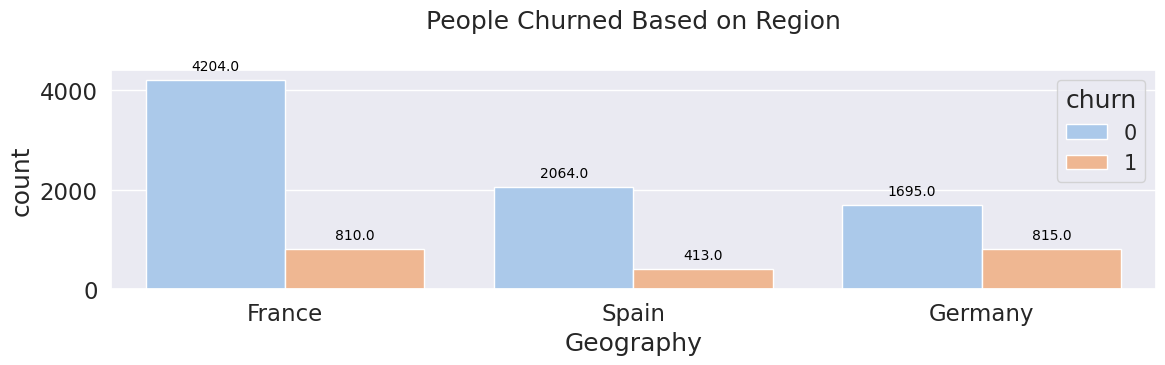

(None, None)

In [ ]:
reg = traindata.groupby('Geography')['Exited'].value_counts()
sns.set_palette('pastel')
plt.figure(figsize = (12,4))
ax = sns.countplot(data = traindata, x = 'Geography', hue = 'Exited')
for p in ax.patches:
                    # Valuenya                          # Posisi
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.legend(loc = 'upper right', fontsize = 15, title = 'churn')
plt.title('People Churned Based on Region', pad = 30)
plt.tight_layout(), plt.show()

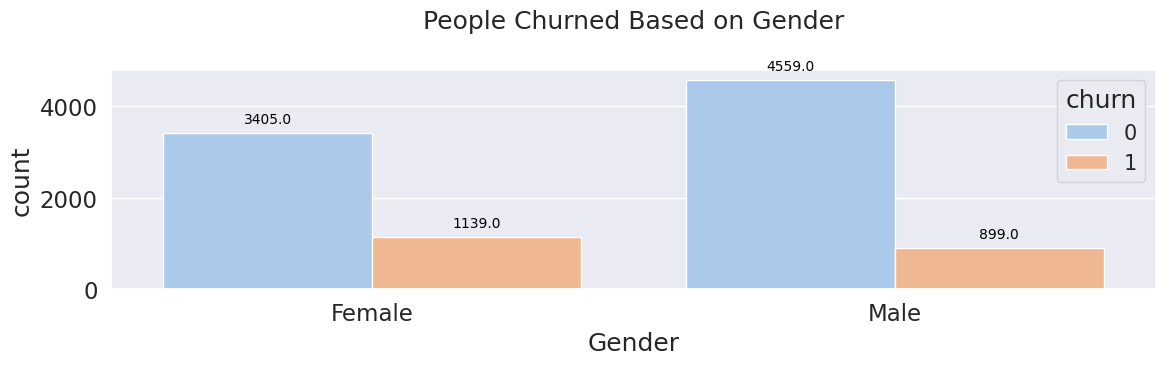

(None, None)

In [ ]:
reg = traindata.groupby('Gender')['Exited'].value_counts()
sns.set_palette('pastel')
plt.figure(figsize = (12,4))
ax = sns.countplot(data = traindata, x = 'Gender', hue = 'Exited')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.legend(loc = 'upper right', fontsize = 15, title = 'churn')
plt.title('People Churned Based on Gender', pad = 30)
plt.tight_layout(), plt.show()

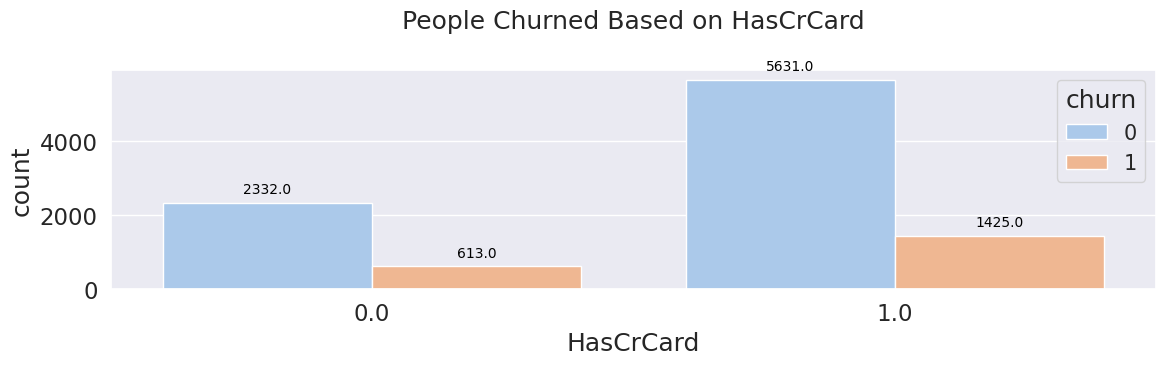

(None, None)

In [ ]:
reg = traindata.groupby('HasCrCard')['Exited'].value_counts()
sns.set_palette('pastel')
plt.figure(figsize = (12,4))
ax = sns.countplot(data = traindata, x = 'HasCrCard', hue = 'Exited')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.legend(loc = 'upper right', fontsize = 15, title = 'churn')
plt.title('People Churned Based on HasCrCard', pad = 30)
plt.tight_layout(), plt.show()

Text(0.5, 1.0, 'People Churned Based on Aktif Member')

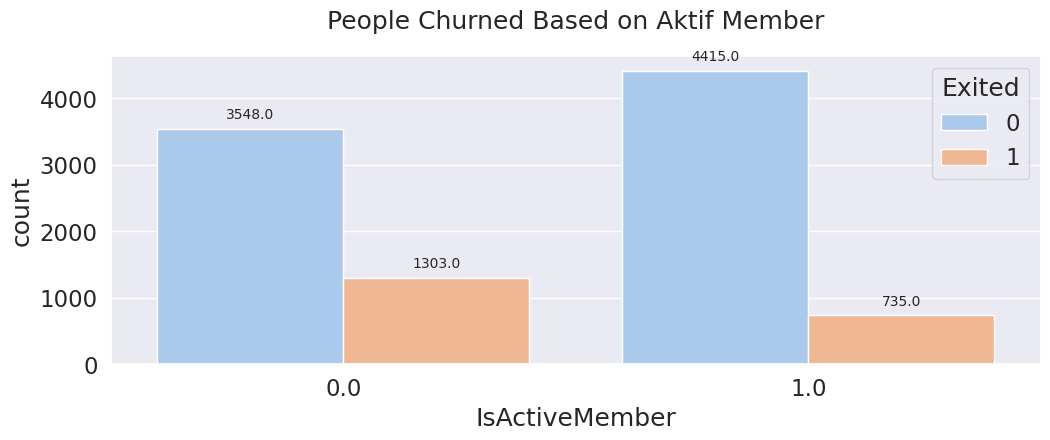

In [ ]:
akt = traindata.groupby('IsActiveMember')['Exited'].value_counts()
plt.figure(figsize=(12,4))
sns.set_palette('pastel')
ax = sns.countplot(data = traindata, x = 'IsActiveMember', hue = 'Exited')
for p in ax.patches:
  ax.annotate(f'{p.get_height()}', (p.get_x()+p.get_width()/2., p.get_height()), ha = 'center', va = 'bottom',
              xytext=(0, 5),textcoords='offset points', fontsize = 10)
plt.title('People Churned Based on Aktif Member', pad=20)

Text(0.5, 1.0, 'People Churned Based on Tenure')

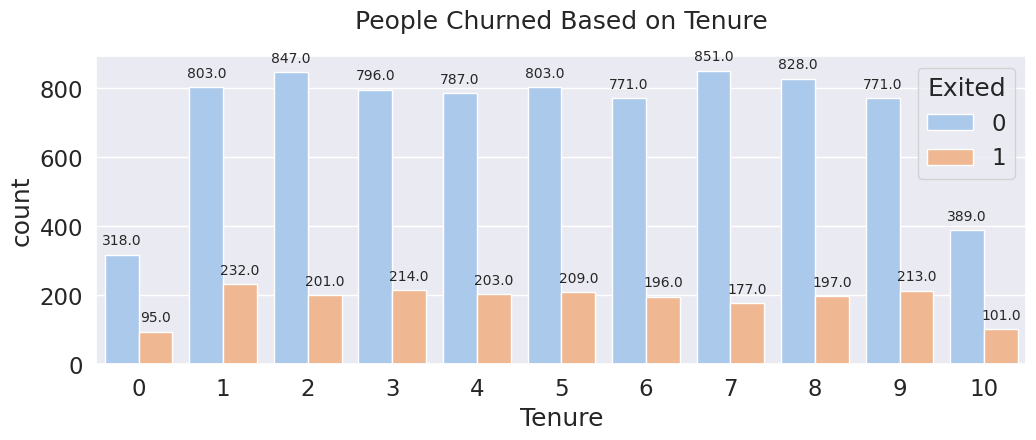

In [ ]:
akt = traindata.groupby('Tenure')['Exited'].value_counts()
plt.figure(figsize=(12,4))
sns.set_palette('pastel')
ax = sns.countplot(data = traindata, x = 'Tenure', hue = 'Exited')
for p in ax.patches:
  ax.annotate(f'{p.get_height()}', (p.get_x()+p.get_width()/2., p.get_height()), ha = 'center', va = 'bottom',
              xytext=(0, 5),textcoords='offset points', fontsize = 10)
plt.title('People Churned Based on Tenure', pad=20)

Text(0.5, 1.0, 'Sebaran Data CreditScore Customer')

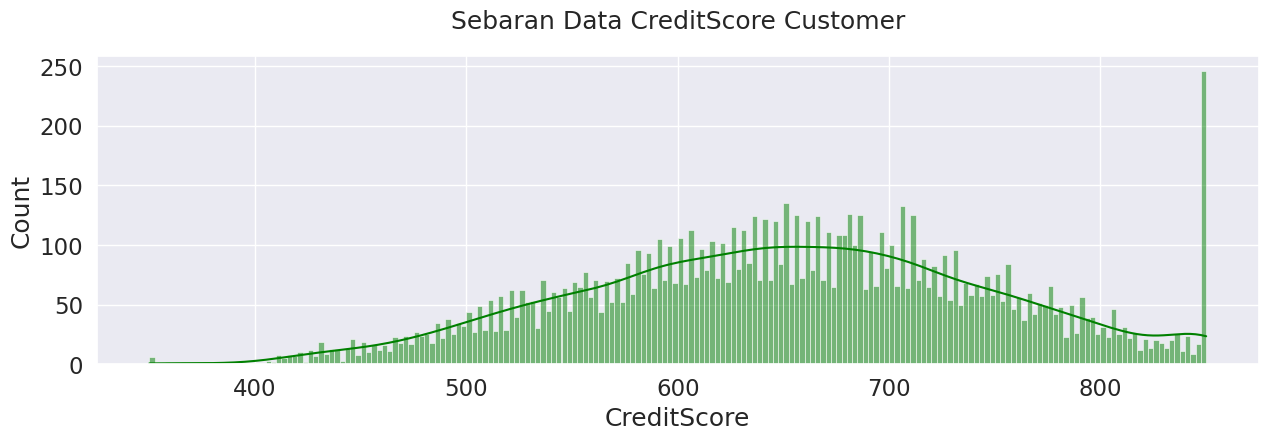

In [ ]:
sns.set_palette('pastel')
plt.figure(figsize = (15,4))
sns.histplot(traindata.CreditScore, kde = True, color = 'green', bins = 200)
plt.title('Sebaran Data CreditScore Customer', pad = 20)

Text(0.5, 1.0, 'Sebaran Data EstimatedSalary Customer')

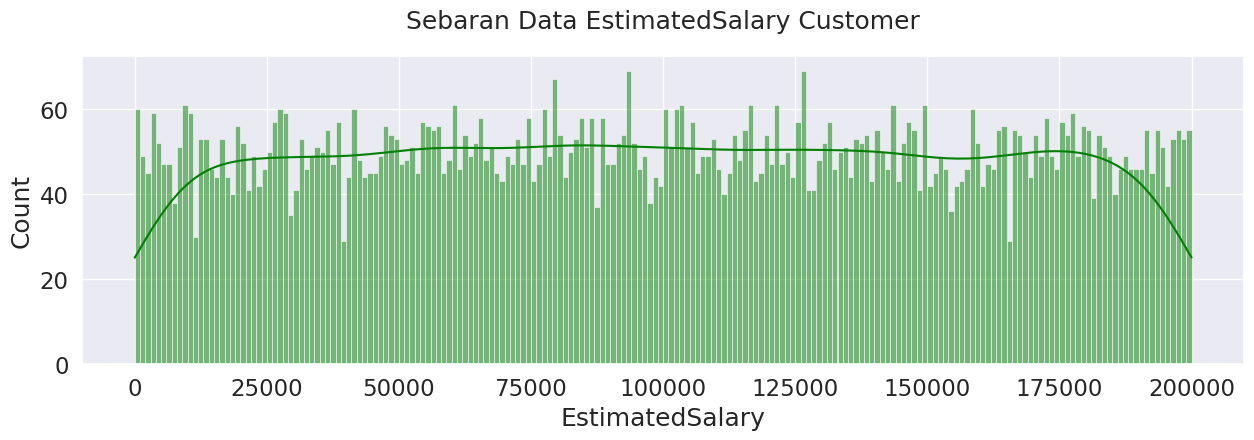

In [ ]:
sns.set_palette('pastel')
plt.figure(figsize = (15,4))
sns.histplot(traindata.EstimatedSalary, kde = True, color = 'green', bins = 200)
plt.title('Sebaran Data EstimatedSalary Customer', pad = 20)

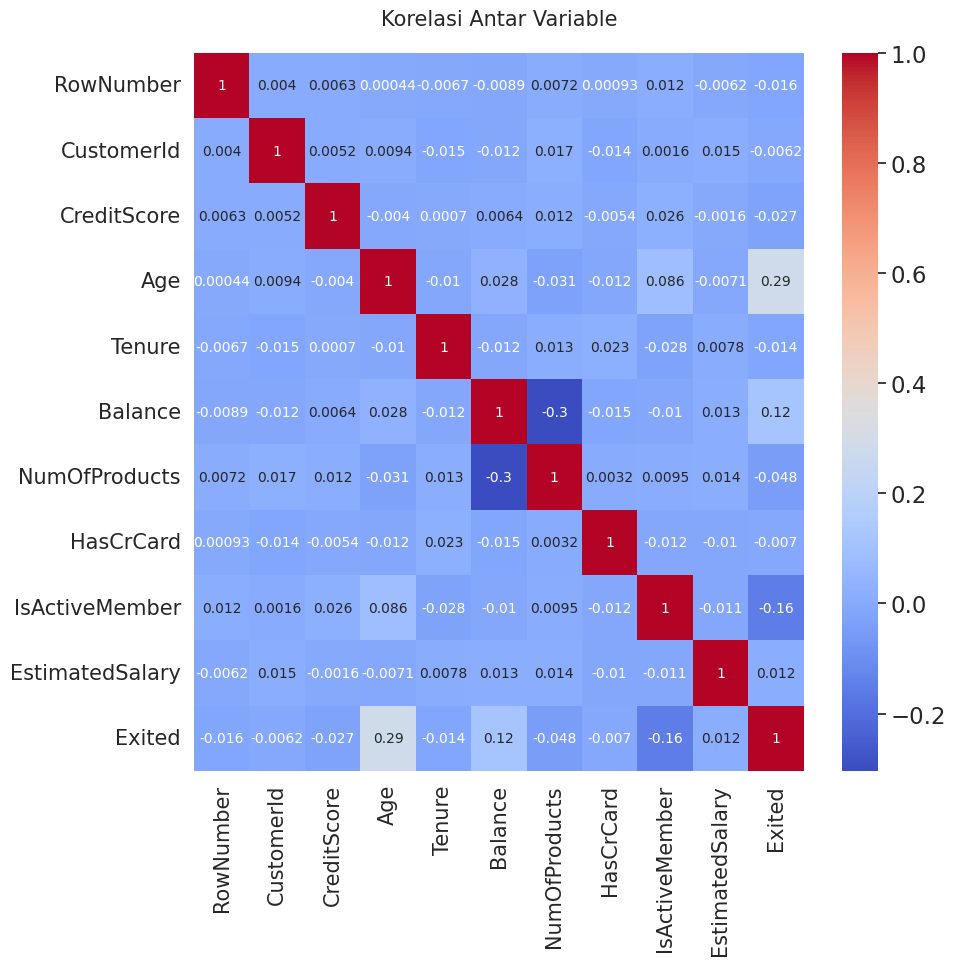

(None, None)

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(traindata.corr(), annot = True, annot_kws={"size": 10}, cmap="coolwarm")
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Korelasi Antar Variable', size=15, pad=20)
plt.tight_layout(), plt.show()

### identifikasi null value

In [ ]:
traindata[(traindata['Geography'].isna()==True)|(traindata['Age'].isna()==True)|(traindata['HasCrCard'].isna()==True)|(traindata['IsActiveMember'].isna()==True)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [ ]:
traindata[(traindata['CreditScore']>=820)&(traindata['CreditScore']<823)].groupby('CreditScore')['Geography'].value_counts()

CreditScore  Geography
820          France       5
             Spain        2
             Germany      1
821          Germany      4
             France       3
             Spain        1
822          France       3
             Germany      1
Name: Geography, dtype: int64

In [ ]:
traindata.groupby('NumOfProducts')['Geography'].value_counts()

NumOfProducts  Geography
1              France       2515
               Germany      1349
               Spain        1221
2              France       2366
               Spain        1183
               Germany      1041
3              France        104
               Germany        96
               Spain          66
4              France         29
               Germany        24
               Spain           7
Name: Geography, dtype: int64

**Catatan**
* null pada column Geography dapat diisi dengan 'France'
* null pada column Age dapat diisi dengan median
* null pada HasCrCard dan IsActiveMember dapat diisi dengan mode pada masing-masing column

# Data Preprocessing

### drop data yang tidak diperlukan

In [ ]:
traindata.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)
traindata.drop_duplicates(inplace = True)

### fill null value

In [ ]:
traindata['Geography'].fillna('France', inplace=True)
traindata['Age'].fillna(traindata['Age'].median(), inplace=True)
traindata['HasCrCard'].fillna(traindata['HasCrCard'].mode()[0], inplace = True)
traindata['IsActiveMember'].fillna(traindata['IsActiveMember'].mode()[0], inplace = True)

### label encoding

In [ ]:
gen = {'Male' : 0, 'Female' : 1}
traindata['Gender'] = traindata['Gender'].replace(gen)

In [ ]:
traindata_encoded = pd.get_dummies(traindata, columns=['Geography'], prefix=['Geography'])
traindata_encoded.shape

(10000, 13)

### data modelling

In [ ]:
traindata_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42.0,2,0.00,1,1.0,1.0,101348.88,1,1,0,0
1,608,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,0,1
2,502,1,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1,0,0
3,699,1,39.0,1,0.00,2,0.0,0.0,93826.63,0,1,0,0
4,850,1,43.0,2,125510.82,1,1.0,1.0,79084.10,0,0,0,1


In [ ]:
x = traindata_encoded.drop(columns = 'Exited')
y = traindata['Exited']
x_scaled = RobustScaler().fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state = 10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 12)
(2000, 12)
(8000,)
(2000,)


# Modelling

### Function Model

In [ ]:
f1 = []
recall = []
accuracy = []
precision = []

def trainmodel_evaluation(algorithm):
  # Training Model
  model = algorithm
  model.fit(x_train, y_train)
  y_test_pred = model.predict(x_test)

  # Metrics Evaluation
  F = f1_score(y_test, y_test_pred, average = None)[0]
  f1.append(F)
  rec = recall_score(y_test, y_test_pred)
  recall.append(rec)
  acc = accuracy_score(y_test, y_test_pred)
  accuracy.append(acc)
  pre = precision_score(y_test, y_test_pred)
  precision.append(pre)
  print(f'F1-Score : {F}')
  print(f'Recall-Score : {rec}')
  print(f'Accuracy Score : {acc}')
  print(f'Precision Score :  {pre}')

  # Visualisasi Confusion Matrix
  # print(classification_report(y_test, y_test_pred))
  print(confusion_matrix(y_test, y_test_pred))
  sns.set_palette('pastel')
  sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap = 'coolwarm',annot_kws={'size':10})
  plt.xlabel('Prediction'), plt.title("Bank Customer Churn", pad=15)
  plt.ylabel('Actual'), plt.show()

### LogisticRegression

F1-Score : 0.8831244535120957
Recall-Score : 0.1990521327014218
Accuracy Score : 0.7995
Precision Score :  0.5714285714285714
[[1515   63]
 [ 338   84]]


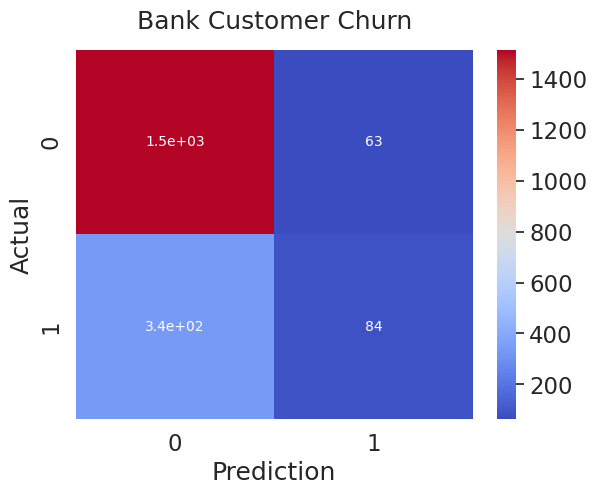

In [ ]:
trainmodel_evaluation(LogisticRegression())

### CatBoost

Learning rate set to 0.025035
0:	learn: 0.6718875	total: 52.6ms	remaining: 52.5s
1:	learn: 0.6508938	total: 59.1ms	remaining: 29.5s
2:	learn: 0.6311498	total: 67.7ms	remaining: 22.5s
3:	learn: 0.6138429	total: 78.3ms	remaining: 19.5s
4:	learn: 0.5967474	total: 85.9ms	remaining: 17.1s
5:	learn: 0.5817401	total: 91.1ms	remaining: 15.1s
6:	learn: 0.5688267	total: 115ms	remaining: 16.3s
7:	learn: 0.5556234	total: 123ms	remaining: 15.3s
8:	learn: 0.5432746	total: 149ms	remaining: 16.4s
9:	learn: 0.5305028	total: 163ms	remaining: 16.2s
10:	learn: 0.5201246	total: 167ms	remaining: 15s
11:	learn: 0.5106002	total: 175ms	remaining: 14.4s
12:	learn: 0.5018141	total: 179ms	remaining: 13.6s
13:	learn: 0.4928611	total: 183ms	remaining: 12.9s
14:	learn: 0.4842830	total: 187ms	remaining: 12.3s
15:	learn: 0.4763085	total: 212ms	remaining: 13.1s
16:	learn: 0.4698428	total: 233ms	remaining: 13.5s
17:	learn: 0.4635847	total: 236ms	remaining: 12.9s
18:	learn: 0.4565822	total: 246ms	remaining: 12.7s
19:	lea

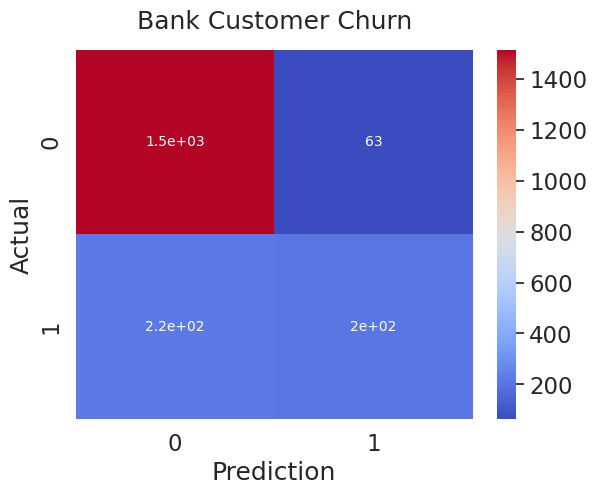

In [ ]:
trainmodel_evaluation(CatBoostClassifier())

### RandomForest

F1-Score : 0.9133715665559915
Recall-Score : 0.47393364928909953
Accuracy Score : 0.8565
Precision Score :  0.7547169811320755
[[1513   65]
 [ 222  200]]


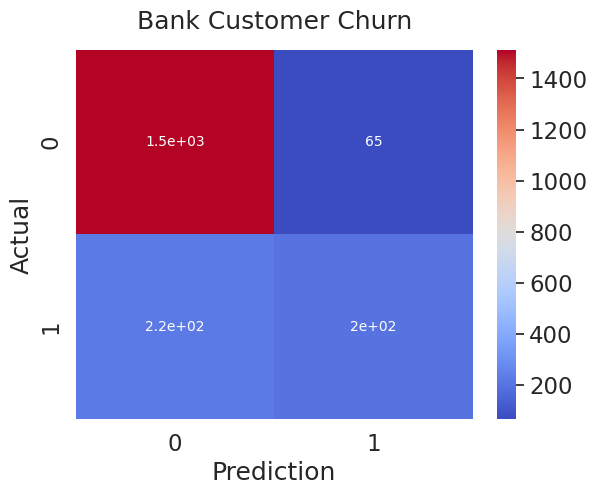

In [ ]:
trainmodel_evaluation(RandomForestClassifier())

### AdaBoost

F1-Score : 0.9099153567110037
Recall-Score : 0.466824644549763
Accuracy Score : 0.851
Precision Score :  0.7296296296296296
[[1505   73]
 [ 225  197]]


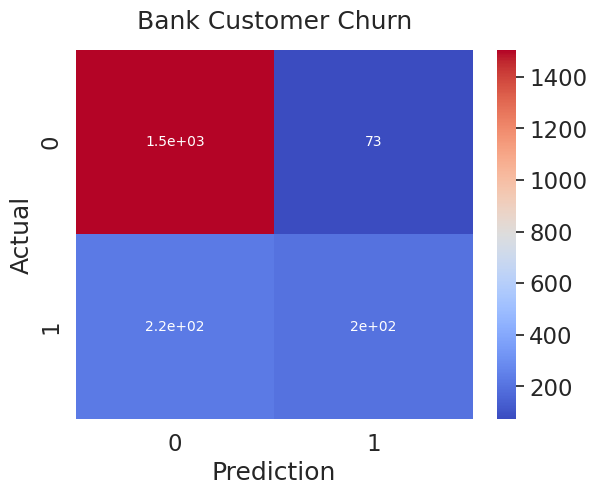

In [ ]:
trainmodel_evaluation(AdaBoostClassifier())

### DecisionTree

F1-Score : 0.8641975308641976
Recall-Score : 0.4881516587677725
Accuracy Score : 0.7855
Precision Score :  0.4916467780429594
[[1365  213]
 [ 216  206]]


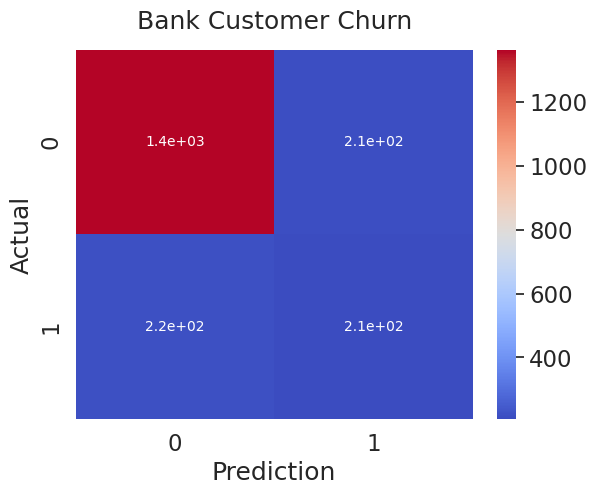

In [ ]:
trainmodel_evaluation((DecisionTreeClassifier()))

### KNeighbors

F1-Score : 0.8966346153846154
Recall-Score : 0.3886255924170616
Accuracy Score : 0.828
Precision Score :  0.656
[[1492   86]
 [ 258  164]]


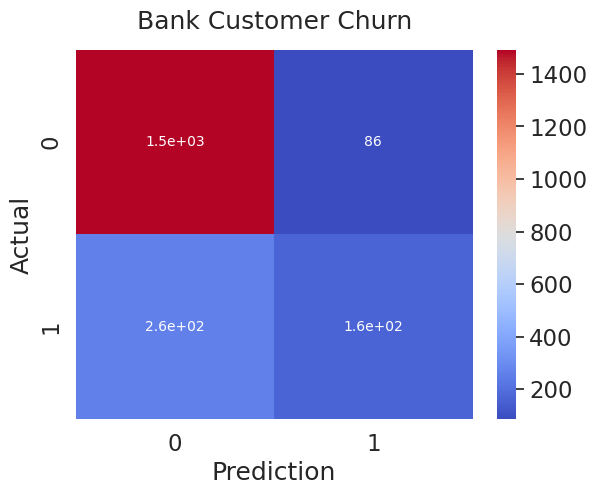

In [ ]:
trainmodel_evaluation(KNeighborsClassifier())

### ExtraTrees

F1-Score : 0.9081632653061225
Recall-Score : 0.42890995260663506
Accuracy Score : 0.847
Precision Score :  0.7357723577235772
[[1513   65]
 [ 241  181]]


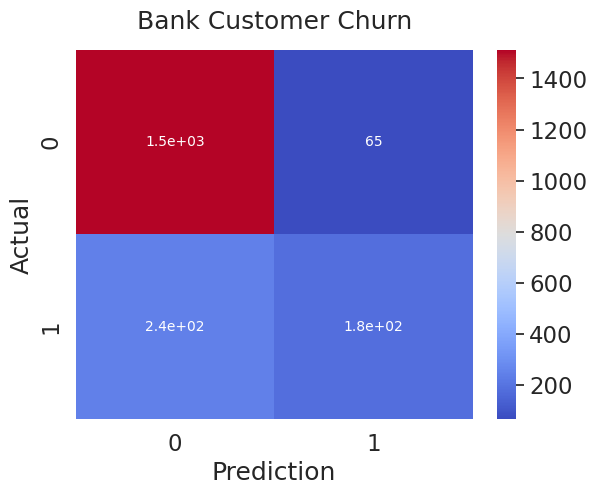

In [ ]:
trainmodel_evaluation(ExtraTreesClassifier())

### Komparasi Model

In [ ]:
f1, recall, accuracy, precision
models = ['LogisticRegression', 'CatBoost', 'RandomForest', 'AdaBoost',
          'DecissionTree', 'KNeighbors', 'ExtraTrees']
compare = pd.DataFrame({'Model' : models,
                        'F1-Score' : f1,'Recall_Score' : recall,
                        'Accuracy_Score' : accuracy,'Precision_Score' : precision})

compare.sort_values(by='F1-Score', ascending = False)

,Model,F1-Score,Recall_Score,Accuracy_Score,Precision_Score
1,CatBoost,0.915408,0.485782,0.8600,0.764925
2,RandomForest,0.913372,0.473934,0.8565,0.754717
3,AdaBoost,0.909915,0.466825,0.8510,0.729630
6,ExtraTrees,0.908163,0.428910,0.8470,0.735772
5,KNeighbors,0.896635,0.388626,0.8280,0.656000
0,LogisticRegression,0.883124,0.199052,0.7995,0.571429
4,DecissionTree,0.864198,0.488152,0.7855,0.491647


**Catatan**
* 3 Model teratas akan dilakukan hyperparameter tune kemudian stacking

# Hyper-Parameter Tune

### CatBoost Hyper-parameter Tune

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid1 = {
    "n_estimators":[int(x) for x in np.linspace(0, 200, 4)],
    'learning_rate': [0.1, 0.01, 0.5],
    'depth': [4, 6, 8]}
catboost = CatBoostClassifier(verbose = False)
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid1, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7e39418ca8f0>,
             param_grid={'depth': [4, 6, 8], 'learning_rate': [0.1, 0.01, 0.5],
                         'n_estimators': [0, 66, 133, 200]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'depth': 4, 'learning_rate': 0.1, 'n_estimators': 200}

F1-Score : 0.9169936613341383
Recall-Score : 0.4881516587677725
Accuracy Score : 0.8625
Precision Score :  0.7773584905660378
[[1519   59]
 [ 216  206]]


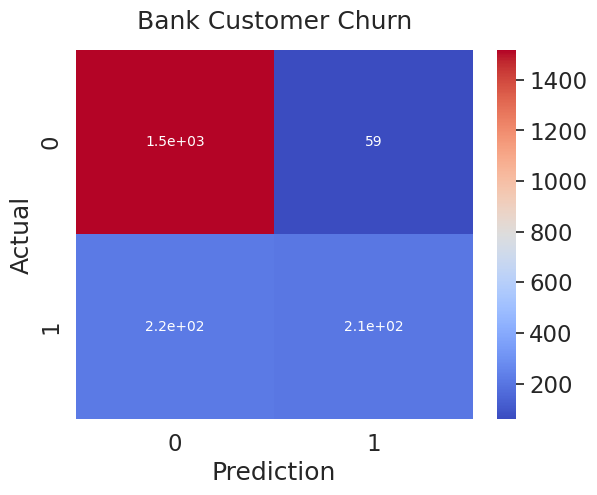

In [ ]:
cat = CatBoostClassifier(**grid_search.best_params_, verbose = False)
trainmodel_evaluation(cat)

### RandomForest Hyper-parameter Tune

In [ ]:
param_grid2 = {
    "n_estimators":[int(x) for x in np.linspace(0, 200, 4)],
    "max_features": ["auto","sqrt"],
    "max_depth":[2,4],
    "min_samples_split":[2,5],
    "min_samples_leaf":[1,2],
    "bootstrap":[True, False]}
randomforest = RandomForestClassifier()
grid_search2 = GridSearchCV(estimator=randomforest,param_grid=param_grid2,cv=3,verbose=2,n_jobs=4)
grid_search2.fit(x_train,y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [0, 66, 133, 200]},
             verbose=2)

In [ ]:
grid_search2.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 66}

F1-Score : 0.902242668200115
Recall-Score : 0.2156398104265403
Accuracy Score : 0.83
Precision Score :  0.91
[[1569    9]
 [ 331   91]]


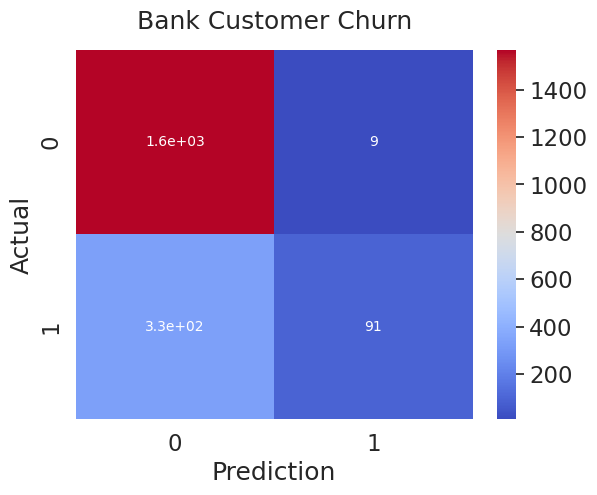

In [ ]:
random = RandomForestClassifier(**grid_search2.best_params_, verbose = False)
trainmodel_evaluation(random)

### AdaBoost Hyper-parameter Tune

In [ ]:
param_grid3 = {
    "n_estimators":[int(x) for x in np.linspace(0, 150, 50)],
    'learning_rate': [0.1, 0.01, 0.5]
    # 'base_estimator':[ExtraTreesClassifier(max_depth = 1),ExtraTreesClassifier(max_depth = 2)]
    }

adaboost = AdaBoostClassifier()
grid_search3 = GridSearchCV(estimator = adaboost, param_grid=param_grid3, cv=3, n_jobs=3, scoring = 'accuracy')
grid_search3.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=3,
             param_grid={'learning_rate': [0.1, 0.01, 0.5],
                         'n_estimators': [0, 3, 6, 9, 12, 15, 18, 21, 24, 27,
                                          30, 33, 36, 39, 42, 45, 48, 52, 55,
                                          58, 61, 64, 67, 70, 73, 76, 79, 82,
                                          85, 88, ...]},
             scoring='accuracy')

In [ ]:
grid_search3.best_params_

{'learning_rate': 0.5, 'n_estimators': 33}

F1-Score : 0.9096949562065841
Recall-Score : 0.46208530805687204
Accuracy Score : 0.8505
Precision Score :  0.7303370786516854
[[1506   72]
 [ 227  195]]


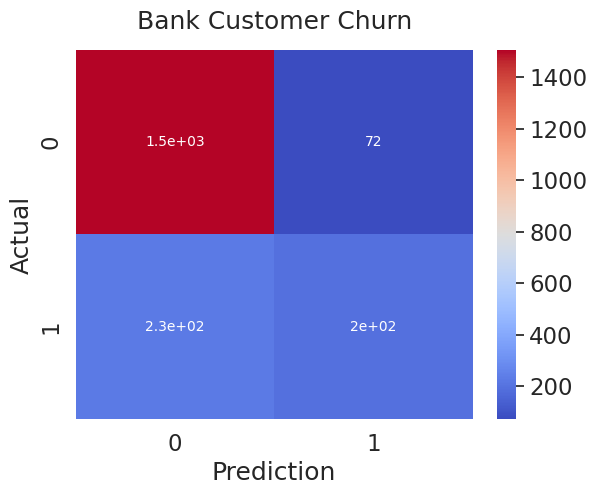

In [ ]:
ada = AdaBoostClassifier(**grid_search3.best_params_)
trainmodel_evaluation(ada)

# Stacking Model

F1-Score : 0.912322988852064
Recall-Score : 0.46208530805687204
Accuracy Score : 0.8545
Precision Score :  0.752895752895753
[[1514   64]
 [ 227  195]]


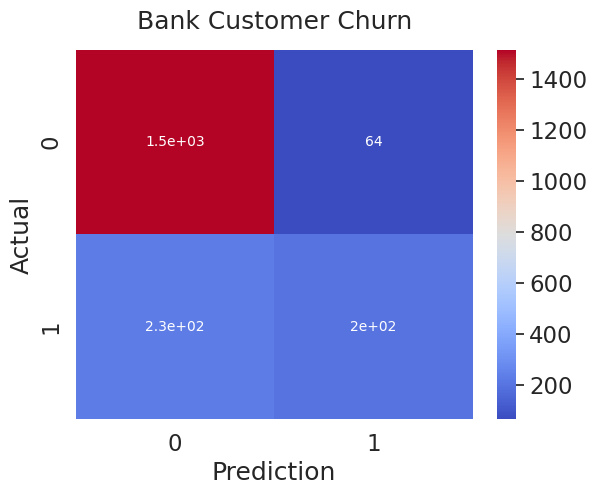

In [ ]:
base_models = [('randomforest', random), ('adaboost', ada)]

stacking = StackingClassifier(
    estimators = base_models,
    final_estimator = cat
    )
trainmodel_evaluation(stacking)

# Save Model

In [ ]:
joblib.dump(stacking, 'model_customer_churn.pkl')

['model_customer_churn.pkl']